In [1]:
#load library and create subsets
library(dplyr)

samples <- read.table('both_samples_condition.tsv')

bsamples <- samples %>% filter(tissue == "brain")
#gsamples <- samples %>% filter(tissue == "gut")
#gundiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "undiff")
#gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
bsamples

,condition,replicate,organoid_stage,id,name,tissue
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
VL1,MLB2,1,4d,VL1,MLB2_brain_4d_VL1,brain
VL2,MLB2,2,4d,VL2,MLB2_brain_4d_VL2,brain
VL3,VA1,1,4d,VL3,VA1_brain_4d_VL3,brain
VL4,VA1,2,4d,VL4,VA1_brain_4d_VL4,brain
VL5,HAstV4,1,4d,VL5,HAstV4_brain_4d_VL5,brain
VL6,HAstV4,2,4d,VL6,HAstV4_brain_4d_VL6,brain
VL7,Mock,1,4d,VL7,Mock_brain_4d_VL7,brain
VL8,Mock,2,4d,VL8,Mock_brain_4d_VL8,brain


In [3]:
bpccounts = as.matrix(read.csv('../../output/brain/counts_protein_coding.csv',row.names = 1))
dim(bpccounts)

[1] 20070     8

In [4]:
library(DESeq2)
colours = c(
    HAstV4='#ff9301',
    MLB2='#592bf5',
    VA1='#1fbd6b',
    mock='#919190')

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are m

In [5]:
bpccounts = bpccounts[,rownames(bsamples)]
bpccounts

,VL1,VL2,VL3,VL4,VL5,VL6,VL7,VL8
ENSG00000142611,362,678,397,488,622,578,342,466
ENSG00000157911,222,402,462,437,546,288,209,346
ENSG00000142655,92,206,256,298,232,143,190,223
ENSG00000149527,68,159,194,231,214,201,127,92
ENSG00000171621,22,44,90,107,16,55,65,46
ENSG00000142583,0,0,0,0,0,7,0,0
ENSG00000173614,45,143,181,59,124,119,87,80
ENSG00000162592,0,9,18,0,0,0,0,0
ENSG00000204624,169,483,321,294,219,393,379,300
ENSG00000142606,5,19,2,5,12,3,6,2


In [5]:
rownames(bsamples) = colnames(bpccounts) = bsamples$name
deseq = DESeqDataSetFromMatrix(countData = bpccounts,
                              colData = bsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 8 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(8): MLB2_brain_4d_VL1 MLB2_brain_4d_VL2 ... Mock_brain_4d_VL7
  Mock_brain_4d_VL8
colData names(6): condition replicate ... name tissue


FALSE  TRUE 
 4965 15105 

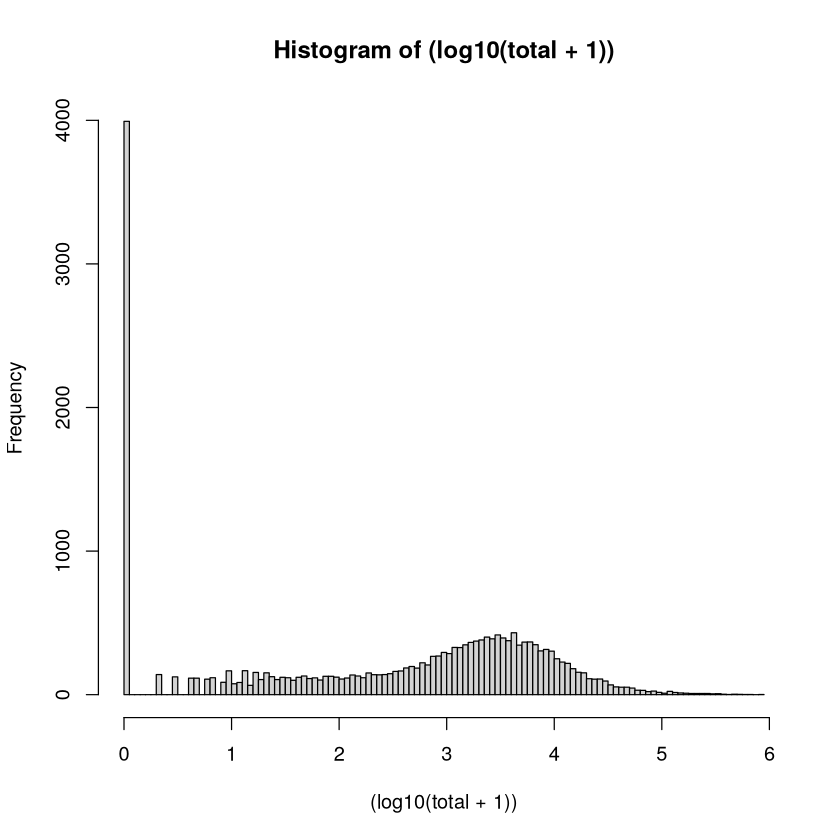

In [6]:
# filter genes by total read counts (true if >10 reads)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)

In [7]:
counts(deseq)[1:10,]>=10

,MLB2_brain_4d_VL1,MLB2_brain_4d_VL2,VA1_brain_4d_VL3,VA1_brain_4d_VL4,HAstV4_brain_4d_VL5,HAstV4_brain_4d_VL6,Mock_brain_4d_VL7,Mock_brain_4d_VL8
ENSG00000142611,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000157911,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000142655,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000149527,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000171621,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000142583,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000173614,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000162592,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000204624,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000142606,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


In [8]:
# filter genes (Counting the number of samples where each gene has ≥10 reads (e.g., 459 genes have ≥10 reads in two samples))
nbsamples10 = rowSums(counts(deseq)>=10)
table(nbsamples10)

nbsamples10
    0     1     2     3     4     5     6     7     8 
 5325   952   459   347   320   304   317   488 11558 

In [9]:
# remove genes with less than 10 reads in total in at least 2 samples.
#deseq = deseq[total>=10,]
deseq = deseq[nbsamples10>=2,]
deseq

class: DESeqDataSet 
dim: 13793 8 
metadata(1): version
assays(1): counts
rownames(13793): ENSG00000142611 ENSG00000157911 ... ENSG00000278817
  ENSG00000271254
rowData names(0):
colnames(8): MLB2_brain_4d_VL1 MLB2_brain_4d_VL2 ... Mock_brain_4d_VL7
  Mock_brain_4d_VL8
colData names(6): condition replicate ... name tissue

In [10]:
#pre-filtering
smallestGroupSize <- 3
keep <- rowSums(counts(deseq) >= 10) >= smallestGroupSize
deseq <- deseq[keep,]

In [11]:
dim(deseq)


[1] 13334     8

In [13]:
levels(deseq$condition)

[1] "HAstV4" "MLB2"   "Mock"   "VA1"

In [15]:
#Note on factor levels - specifying the reference level as Mock
deseq$condition <- relevel(deseq$condition, ref = "Mock")

In [22]:
# Run DESeq analysis
deseq <- DESeq(deseq)
# This will give you the results comparing each condition to "Mock" (due to relevel)
res <- results(deseq)
res

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition VA1 vs Mock 
Wald test p-value: condition VA1 vs Mock 
DataFrame with 13334 rows and 6 columns
                   baseMean log2FoldChange     lfcSE       stat    pvalue
                  <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSG00000142611    482.1434     -0.0677873  0.259653  -0.261069 0.7940394
ENSG00000157911    349.5208      0.4947761  0.320647   1.543053 0.1228178
ENSG00000142655    196.7115      0.2172159  0.364955   0.595185 0.5517198
ENSG00000149527    153.7660      0.7330622  0.420251   1.744344 0.0810991
ENSG00000171621     53.8773      0.6027595  0.745651   0.808367 0.4188794
...                     ...            ...       ...        ...       ...
ENSG00000198727 18042.62927      0.2527119  0.167124  1.5121255 0.1305019
ENSG00000276256    78.84019      1.1610610  0.607987  1.9096798 0.0561745
ENSG00000273748   123.86313     -0.3605661  0.537511 -0.6708069 0.5023436
ENSG00000278817   112.81590     -0.0373715  0.491779 -0.0

In [17]:
levels(deseq$condition)

[1] "Mock"   "HAstV4" "MLB2"   "VA1"

In [21]:
colData(deseq)

DataFrame with 8 rows and 7 columns
                    condition replicate organoid_stage          id
                     <factor> <integer>    <character> <character>
MLB2_brain_4d_VL1      MLB2           1             4d         VL1
MLB2_brain_4d_VL2      MLB2           2             4d         VL2
VA1_brain_4d_VL3       VA1            1             4d         VL3
VA1_brain_4d_VL4       VA1            2             4d         VL4
HAstV4_brain_4d_VL5    HAstV4         1             4d         VL5
HAstV4_brain_4d_VL6    HAstV4         2             4d         VL6
Mock_brain_4d_VL7      Mock           1             4d         VL7
Mock_brain_4d_VL8      Mock           2             4d         VL8
                                   name      tissue sizeFactor
                            <character> <character>  <numeric>
MLB2_brain_4d_VL1     MLB2_brain_4d_VL1       brain   0.644985
MLB2_brain_4d_VL2     MLB2_brain_4d_VL2       brain   1.193597
VA1_brain_4d_VL3       VA1_brain_4d_VL3   

In [23]:
#We can order our results table by the smallest p value
resOrdered <- res[order(res$pvalue),]

In [24]:
summary(res)


out of 13334 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [25]:
sum(res$padj < 0.1, na.rm=TRUE)

[1] 0

In [26]:
head(res)


log2 fold change (MLE): condition VA1 vs Mock 
Wald test p-value: condition VA1 vs Mock 
DataFrame with 6 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000142611  482.1434     -0.0677873  0.259653 -0.261069 0.7940394
ENSG00000157911  349.5208      0.4947761  0.320647  1.543053 0.1228178
ENSG00000142655  196.7115      0.2172159  0.364955  0.595185 0.5517198
ENSG00000149527  153.7660      0.7330622  0.420251  1.744344 0.0810991
ENSG00000171621   53.8773      0.6027595  0.745651  0.808367 0.4188794
ENSG00000173614   99.3654      0.2647750  0.577515  0.458473 0.6466129
                     padj
                <numeric>
ENSG00000142611  0.999865
ENSG00000157911  0.999865
ENSG00000142655  0.999865
ENSG00000149527  0.999865
ENSG00000171621  0.999865
ENSG00000173614  0.999865

In [27]:
#Если p-value слишком высокие, попробуйте сортировать по log2 Fold Change, чтобы увидеть, какие гены имеют наибольшие изменения экспрессии. вывод первых 20 генов.
resOrderedLFC <- res[order(abs(res$log2FoldChange), decreasing = TRUE), ]
head(resOrderedLFC, 20)

log2 fold change (MLE): condition VA1 vs Mock 
Wald test p-value: condition VA1 vs Mock 
DataFrame with 20 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000198633  18.62087       -7.43103   1.99511  -3.72462 0.000195609
ENSG00000128655  18.20223        7.33755   1.88079   3.90131 0.000095675
ENSG00000101282  12.88081        7.20366   2.21381   3.25397 0.001138060
ENSG00000124253   9.10517       -7.10325   4.78971  -1.48302 0.138067911
ENSG00000151224  13.60206        7.08187   4.37896   1.61725 0.105824398
...                   ...            ...       ...       ...         ...
ENSG00000183508   7.28961        6.49483   2.46362   2.63630  0.00838152
ENSG00000158125   8.74603        6.40186   2.31736   2.76257  0.00573481
ENSG00000145945   9.22228        6.39652   2.14155   2.98686  0.00281860
ENSG00000198624   9.09882        6.37191   2.24816   2.83427  0.0045930

In [28]:
#записать в таблицу гены, сортированные по log2 Fold Change, чтобы увидеть, какие гены имеют наибольшие изменения экспрессии
write.table(resOrdered, file = "results_deseq_relevelMock_sortedLFC.tsv", sep = "\t", quote = FALSE, row.names = TRUE)


In [29]:
#Даже если у вас нет значимых p-value (< 0.05 или < 0.1), вы все равно можете отсортировать таблицу результатов по самому маленькому p-value, чтобы посмотреть, какие гены показывают хотя бы какие-то различия.
resOrdered <- res[order(res$pvalue, na.last = NA), ]  # na.last=NA убирает NA
head(resOrdered, 20) 

log2 fold change (MLE): condition VA1 vs Mock 
Wald test p-value: condition VA1 vs Mock 
DataFrame with 20 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000117707   71.7438        2.73574  0.612403   4.46723 7.92402e-06
ENSG00000128655   18.2022        7.33755  1.880793   3.90131 9.56750e-05
ENSG00000128610  143.9691        2.67462  0.689389   3.87970 1.04584e-04
ENSG00000006534   36.8968        3.87020  1.003771   3.85566 1.15416e-04
ENSG00000134996   22.0190        6.75609  1.770251   3.81646 1.35380e-04
...                   ...            ...       ...       ...         ...
ENSG00000120549   56.6318       3.108708  0.930771   3.33993 0.000837998
ENSG00000143321 2882.9190      -0.522209  0.157833  -3.30863 0.000937540
ENSG00000187634   53.4298      -2.302776  0.696111  -3.30806 0.000939458
ENSG00000013810  762.5236      -0.690170  0.210866  -3.27302 0.00106404

In [30]:
#How many adjusted p-values were less than 0.1?
sum(res$padj < 0.1, na.rm=TRUE)

[1] 0

In [31]:
res05 <- results(deseq, alpha=0.05)
summary(res05)


out of 13334 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [32]:
sum(res05$padj < 0.05, na.rm=TRUE)



[1] 0

In [34]:
install.packages("BiocManager")
BiocManager::install("IHW")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'IHW'

also installing the dependencies ‘slam’, ‘lpsymphony’, ‘fdrtool’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit64', 'bslib', 'caret', 'cli', 'clock', 'cpp11', 'curl',
  'data.table', 'GenomeInfoDb', 'gower', 'hardhat', 'jsonlite', 'locfit',
  'MASS', 'Matrix', 'nlme', 'openssl', 'parallelly', 'processx', 'ps', 'purrr',
  'R6', 'RcppArmadillo', 'readxl', 'recipes', 'SparseArray', 'systemfonts',
  'textshaping', 'tinytex', 'xfun', 'xml2', 'zoo'



In [35]:
# (unevaluated code chunk)
library("IHW")
resIHW <- results(deseq, filterFun=ihw)
summary(resIHW)
sum(resIHW$padj < 0.1, na.rm=TRUE)
metadata(resIHW)$ihwResult


out of 13334 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
[1] see 'cooksCutoff' argument of ?results
see metadata(res)$ihwResult on hypothesis weighting



[1] 0

ihwResult object with 13334 hypothesis tests 
Nominal FDR control level: 0.1 
Split into 8 bins, based on an ordinal covariate